In [ ]:
pip install -U fortran-magic

In [ ]:
!git clone https://github.com/ssanderson/pydata-toolbox

Cloning into 'pydata-toolbox'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 70 (delta 10), reused 0 (delta 0), pack-reused 52
Unpacking objects: 100% (70/70), done.


In [ ]:
import py_compile

In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [107]:
assert ran_the_first_cell, "Oh noes!"

In [108]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [109]:
a = [(2,5), 6, 'Hola', 12.37, 'a']
print(a)

[(2, 5), 6, 'Hola', 12.37, 'a']


In [110]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [111]:
primero = a[0]
segundo = a[1]
print("primero:", primero)
print("segundo:", segundo)

primero: (2, 5)
segundo: 6


In [112]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [113]:
ultimo = a[-1]
penultimo = a[-2]
print("ultimo:", ultimo)
print("penúltimo:", penultimo)

ultimo: a
penúltimo: 12.37


In [114]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [115]:
sublista = a[0:3]
print(sublista)

[(2, 5), 6, 'Hola']


In [116]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [117]:
primeros = a[:4]
print(primeros)

[(2, 5), 6, 'Hola', 12.37]


In [118]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [119]:
ultimos = a[3:]
print(ultimos)

[12.37, 'a']


In [120]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [121]:
a = ['A', 'B', 'C', 'D', 'E', 'F', 'G','H']
print(a[1:9:2])

['B', 'D', 'F', 'H']


In [122]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [123]:
print(a[::-1])

['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']


In [124]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [125]:
a = [5, 6, 7, 8, 9]
print("Antes:", a)
a.append('Diez')
print("Despues:", a)

Antes: [5, 6, 7, 8, 9]
Despues: [5, 6, 7, 8, 9, 'Diez']


In [126]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [127]:
a = [5, 6, 7, 8, 9]
print([x ** 2 for x in a])

[25, 36, 49, 64, 81]


## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [128]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [129]:
writers = {'Cervantes': 'Don Quijote', 'Shakespeare': 'Hamlet', 'Poe': 'El cuervo'}
print(writers)

{'Cervantes': 'Don Quijote', 'Shakespeare': 'Hamlet', 'Poe': 'El cuervo'}


In [130]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [131]:
writers['García Marquez'] = 'Cien años de soledad'
print(writers)

{'Cervantes': 'Don Quijote', 'Shakespeare': 'Hamlet', 'Poe': 'El cuervo', 'García Marquez': 'Cien años de soledad'}


In [132]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [133]:
del writers['Poe']
print(writers)

{'Cervantes': 'Don Quijote', 'Shakespeare': 'Hamlet', 'García Marquez': 'Cien años de soledad'}


In [134]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

In [136]:
print(writers['Cervantes':'Shakespeare'])

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [138]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [155]:
c = [[4, 2, 3],
     [7, 9, 0],
     [5, 6, 9]]

d = [[1, 2, 3, 4],
     [2, 3, 4, 5],
     [0, 7, 8, 1]]

In [139]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [140]:
%%time

matmul(a, b)

CPU times: user 24 µs, sys: 4 µs, total: 28 µs
Wall time: 31.2 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [156]:
%%time
print(matmul(c,d))

[[8, 35, 44, 29], [25, 41, 57, 73], [17, 91, 111, 59]]
CPU times: user 88 µs, sys: 13 µs, total: 101 µs
Wall time: 108 µs


In [141]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.4295725686019263, 0.4618026299089063, 0.533740910188316],
 [0.13396958367966438, 0.7921560194363361, 0.8615566710905725]]

In [142]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 9.35 s, sys: 0 ns, total: 9.35 s
Wall time: 9.38 s


In [158]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [157]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [159]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [160]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 11.8 ms, sys: 959 µs, total: 12.8 ms
Wall time: 14.8 ms


333328333350000.0

In [161]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 236 µs, sys: 0 ns, total: 236 µs
Wall time: 254 µs


333328333350000.0

<center><img src="images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [162]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [163]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [164]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [178]:
arr = np.array([4,5,6,7,8,9])
print(arr)

[4 5 6 7 8 9]


In [165]:
data + data

array([2, 4, 6, 8])

In [179]:
print(arr+arr)

[ 8 10 12 14 16 18]


In [166]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 1.32 ms, total: 1.32 ms
Wall time: 1.1 ms


333328333350000.0

In [167]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 993 µs, sys: 4.45 ms, total: 5.45 ms
Wall time: 4.39 ms


333328333350000.0

In [168]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 139 µs, sys: 21 µs, total: 160 µs
Wall time: 167 µs


333328333350000.0

In [169]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [180]:
arr[1] = 'hola'

ValueError: ignored

In [170]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [181]:
arr.append(10)

AttributeError: ignored

In [171]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

In [183]:
matriz = arr.reshape(2,3)
matriz

array([[4, 5, 6],
       [7, 8, 9]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [185]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [187]:
matriz = np.array([4, 5, 6, 7, 8, 9], dtype='int16').reshape(2, 3)
print("Array:\n", matriz, sep='')
print("===========")
print("DType:", matriz.dtype)
print("Shape:", matriz.shape)
print("Strides:", matriz.strides)
print("Data:", matriz.data.tobytes())

Array:
[[4 5 6]
 [7 8 9]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [188]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [189]:
matriz = np.arange(16).reshape(4,4)
print(matriz)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [191]:
print(matriz*matriz)

[[  0   1   4   9]
 [ 16  25  36  49]
 [ 64  81 100 121]
 [144 169 196 225]]


In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [192]:
print(np.sqrt(matriz))

[[0.         1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974 2.64575131]
 [2.82842712 3.         3.16227766 3.31662479]
 [3.46410162 3.60555128 3.74165739 3.87298335]]


In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [195]:
print((matriz % 5) == 0)

[[ True False False False]
 [False  True False False]
 [False False  True False]
 [False False False  True]]


In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [196]:
((matriz % 2) == 0) & ((matriz % 5) == 0)

array([[ True, False, False, False],
       [False, False, False, False],
       [False, False,  True, False],
       [False, False, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [197]:
matriz @ matriz.T

array([[ 14,  38,  62,  86],
       [ 38, 126, 214, 302],
       [ 62, 214, 366, 518],
       [ 86, 302, 518, 734]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [198]:
seno = np.sin(np.linspace(0, 6.28, 5))
coseno = np.cos(np.linspace(0, 6.28, 5))
print(seno)

[ 0.          0.99999968  0.00159265 -0.99999715 -0.0031853 ]


In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [200]:
seno[1]

0.9999996829318346

In [ ]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [201]:
coseno[:4]

array([ 1.00000000e+00,  7.96326711e-04, -9.99998732e-01, -2.38897811e-03])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [202]:
seno[3:]

array([-0.99999715, -0.0031853 ])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [203]:
seno[::2]

array([ 0.        ,  0.00159265, -0.0031853 ])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [204]:
print("seno:\n", seno)
print("seno > 0.5:\n", seno > 0.5)
print("seno[seno > 0.5]:\n", seno[seno > 0.5])

seno:
 [ 0.          0.99999968  0.00159265 -0.99999715 -0.0031853 ]
seno > 0.5:
 [False  True False False False]
seno[seno > 0.5]:
 [0.99999968]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [206]:
print(seno)
seno[[0, 2, 4]]

[ 0.          0.99999968  0.00159265 -0.99999715 -0.0031853 ]


array([ 0.        ,  0.00159265, -0.0031853 ])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [207]:
unsorted_array = np.array([4,8,2,6,0,12,3,10])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [208]:
sort_array = np.argsort(unsorted_array)
print(sort_array)

[4 2 6 0 3 1 7 5]


In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [209]:
unsorted_array[sort_array]

array([ 0,  2,  3,  4,  6,  8, 10, 12])

In [210]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [212]:
a = np.array([3,7,12,56,0,9,15])
b = np.array(['a','b','c','d','e','f','g'])

In [211]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [213]:
sort_a = np.argsort(a)
b[sort_a]

array(['e', 'a', 'b', 'f', 'c', 'g', 'd'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [216]:
array = np.arange(20).reshape(4,5)
array

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [217]:
array[:3, :2]

array([[ 0,  1],
       [ 5,  6],
       [10, 11]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [218]:
array[:3,[0,-1]]

array([[ 0,  4],
       [ 5,  9],
       [10, 14]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [220]:
array[(array[:,0]%2)==0]

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [221]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [224]:
variance(np.random.standard_normal(1000))

1.000297016635949

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

In [226]:
value = np.arange(25)
value.mean()

12.0

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [229]:
matriz = np.arange(25).reshape(5,5)
print(matriz)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [ ]:
data.mean()

14.5

In [231]:
print(matriz.mean())

12.0


In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [236]:
matriz.mean(axis=0)

array([10., 11., 12., 13., 14.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [235]:
matriz.mean(axis=1)

array([ 2.,  7., 12., 17., 22.])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [239]:
linea = np.array([5,6,7])
columna = np.array([[1], [2], [3]])
print("Linea:\n", linea, sep='')
print("Columna:\n", columna, sep='')

Linea:
[5 6 7]
Columna:
[[1]
 [2]
 [3]]


In [237]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [240]:
linea+columna

array([[ 6,  7,  8],
       [ 7,  8,  9],
       [ 8,  9, 10]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [241]:
print("Matriz:\n", matriz, sep='')
print("Mean:\n", matriz.mean(axis=0), sep='')
print("Matriz - Mean:\n", matriz - matriz.mean(axis=0), sep='')

Matriz:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
Mean:
[10. 11. 12. 13. 14.]
Matriz - Mean:
[[-10. -10. -10. -10. -10.]
 [ -5.  -5.  -5.  -5.  -5.]
 [  0.   0.   0.   0.   0.]
 [  5.   5.   5.   5.   5.]
 [ 10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [242]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [244]:
a = pd.Series(index=['A', 'B', 'C', 'D', 'E', 'F'], data=[4, 5, 6, 7, 8, 9])
a

A    4
B    5
C    6
D    7
E    8
F    9
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [245]:
print("The index is:", a.index)
print("The values are:", a.values)

The index is: Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')
The values are: [4 5 6 7 8 9]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [246]:
a.iloc[1]

5

In [ ]:
# ... or by label.
s.loc['a']

1

In [247]:
a.loc['F']

9

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [250]:
a.iloc[:4]

A    4
B    5
C    6
D    7
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [251]:
a.loc[:'D']

A    4
B    5
C    6
D    7
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [252]:
a.iloc[[0,-1]]

A    4
F    9
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [253]:
a.loc[a<7]

A    4
B    5
C    6
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [254]:
other_a = pd.Series({'A': 15.0, 'C': 25.0, 'D': 30.0, 'S': 45.0})
other_a

A    15.0
C    25.0
D    30.0
S    45.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [255]:
a+other_a

A    19.0
B     NaN
C    31.0
D    37.0
E     NaN
F     NaN
S     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [256]:
(a + other_a).fillna(1.0)

A    19.0
B     1.0
C    31.0
D    37.0
E     1.0
F     1.0
S     1.0
dtype: float64

In [257]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [258]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [259]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

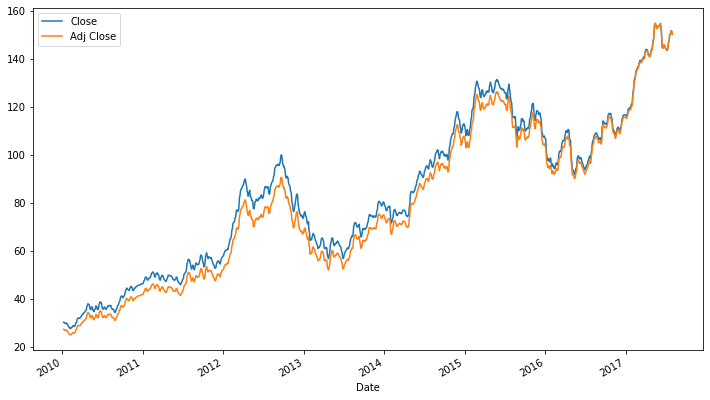

In [260]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

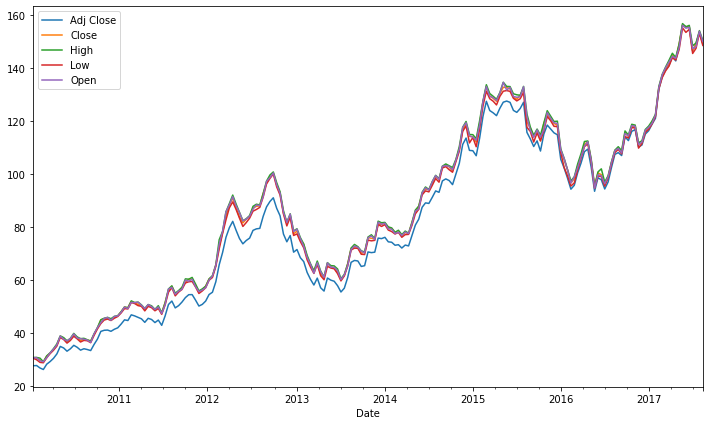

In [261]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

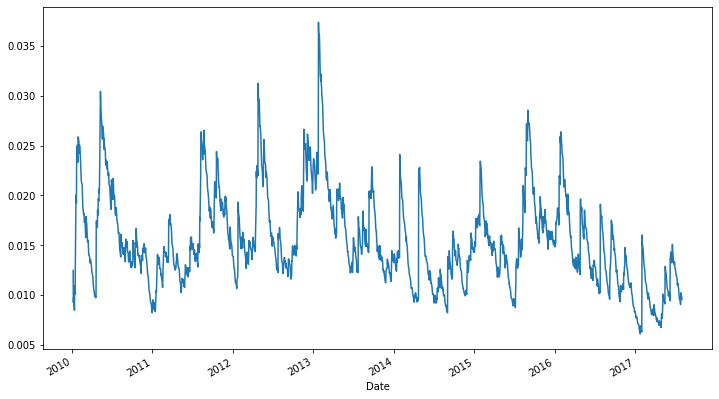

In [262]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [148]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [263]:
aguacates = pd.read_csv('Avocato_Data(1).csv')
aguacates.head()

,COD. DEP.,DEPARTAMENTO,COD. MUN.,MUNICIPIO,GRUPO DE CULTIVO,SUBGRUPO DE CULTIVO,CULTIVO,DESAGREGACION REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,AREA SEMBRADA (ha),AREA COSECHADA (ha),PRODUCCION (t),RENDIMIENTO(t/ha),ESTADO FISICO PRODUCCION,NOMBRE CIENTIFICO,CICLO DE CULTIVO
0,5,ANTIOQUIA,5607,RETIRO,FRUTALES,AGUACATE,AGUACATE,AGUACATE,2007,2007,401,170,2380,14.00,FRUTO FRESCO,PERSEA AMERICANA MILL.,PERMANENTE
1,5,ANTIOQUIA,5679,SANTA BARBARA,FRUTALES,AGUACATE,AGUACATE,AGUACATE,2007,2007,310,300,2250,7.50,FRUTO FRESCO,PERSEA AMERICANA MILL.,PERMANENTE
2,5,ANTIOQUIA,5376,LA CEJA,FRUTALES,AGUACATE,AGUACATE,AGUACATE,2007,2007,200,150,2175,14.50,FRUTO FRESCO,PERSEA AMERICANA MILL.,PERMANENTE
3,5,ANTIOQUIA,5490,NECOCLI,FRUTALES,AGUACATE,AGUACATE,AGUACATE,2007,2007,200,130,2600,20.00,FRUTO FRESCO,PERSEA AMERICANA MILL.,PERMANENTE
4,5,ANTIOQUIA,5837,TURBO,FRUTALES,AGUACATE,AGUACATE,AGUACATE,2007,2007,199,146,1495,10.24,FRUTO FRESCO,PERSEA AMERICANA MILL.,PERMANENTE


In [149]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

In [264]:
aguacates.dtypes

COD. DEP.                                          int64
DEPARTAMENTO                                      object
COD. MUN.                                          int64
MUNICIPIO                                         object
GRUPO DE CULTIVO                                  object
SUBGRUPO DE CULTIVO                               object
CULTIVO                                           object
DESAGREGACION REGIONAL Y/O SISTEMA PRODUCTIVO     object
AÑO                                                int64
PERIODO                                            int64
AREA SEMBRADA (ha)                                 int64
AREA COSECHADA (ha)                                int64
PRODUCCION (t)                                     int64
RENDIMIENTO(t/ha)                                float64
ESTADO FISICO PRODUCCION                          object
NOMBRE CIENTIFICO                                 object
CICLO DE CULTIVO                                  object
dtype: object

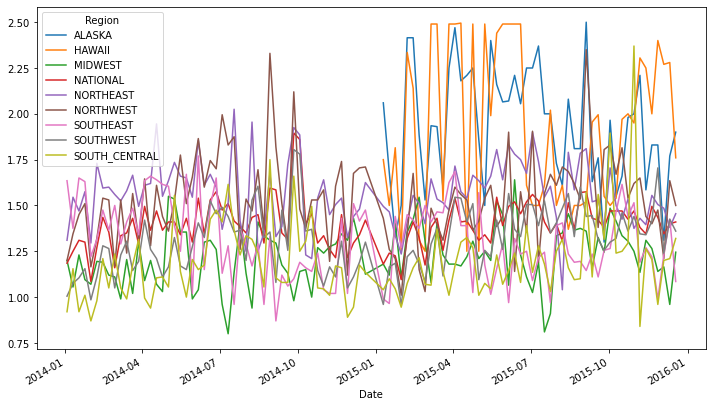

In [267]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

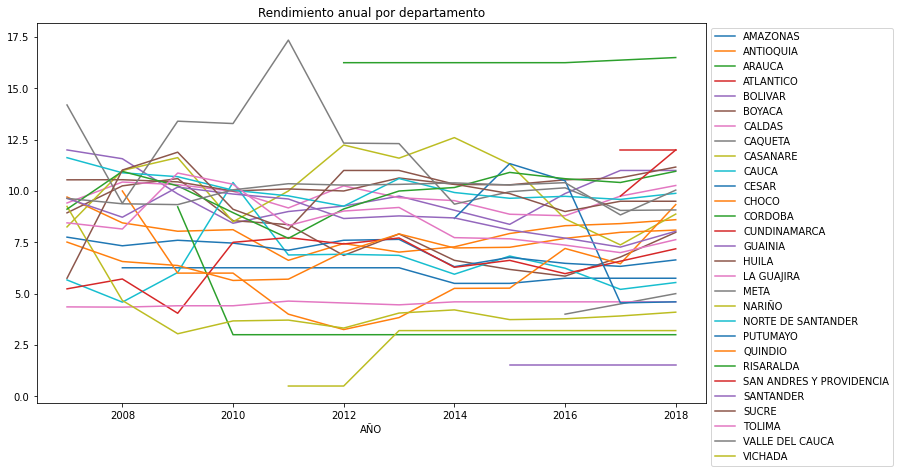

In [266]:
graph = aguacates
graph.groupby(['AÑO', 'DEPARTAMENTO'])['RENDIMIENTO(t/ha)'].mean().unstack().ffill().plot(figsize=(12, 7));
plt.gca().set_title("Rendimiento anual por departamento");
plt.legend(bbox_to_anchor=(1,1));

In [278]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [289]:
def net_harvest(srs):
  x = srs['AREA COSECHADA (ha)']
  y = srs['AREA SEMBRADA (ha)']
  srs['COSECHA NETA (ha)'] = y-x
def net_harvest_by_region(grp):
  return grp.groupby(['AÑO', 'DEPARTAMENTO'])['COSECHA NETA (ha)'].mean().unstack().ffill().fillna(0.0)

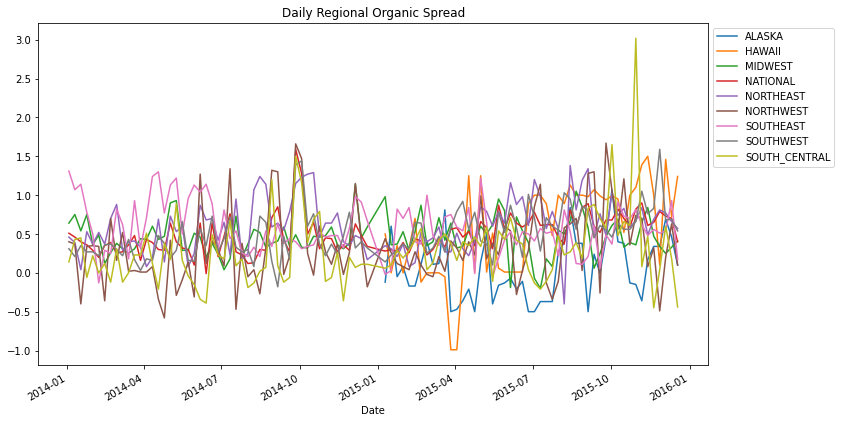

In [279]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

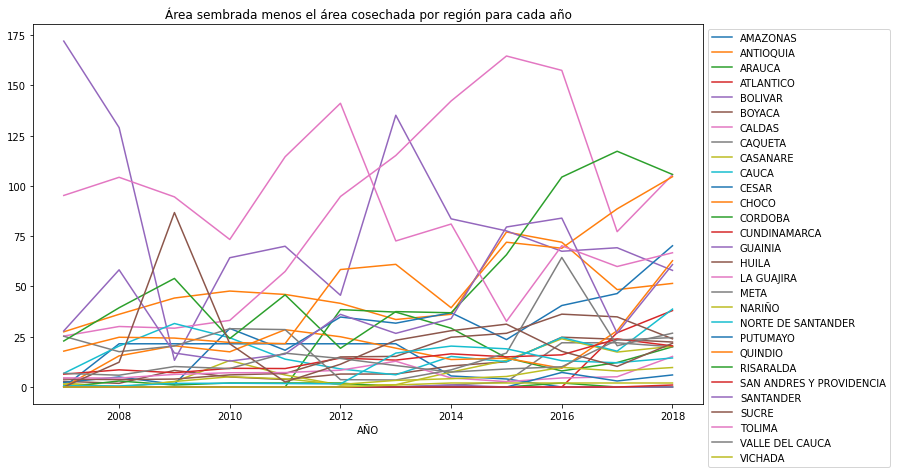

In [290]:
net_harvest(aguacates)
ssah = net_harvest_by_region(aguacates).plot(figsize=(12, 7));
plt.gca().set_title("Área sembrada menos el área cosechada por región para cada año");
plt.legend(bbox_to_anchor=(1,1));

In [153]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


In [291]:
net_harvest_table = net_harvest_by_region(aguacates)
net_harvest_table

DEPARTAMENTO,AMAZONAS,ANTIOQUIA,ARAUCA,ATLANTICO,BOLIVAR,BOYACA,CALDAS,CAQUETA,CASANARE,CAUCA,CESAR,CHOCO,CORDOBA,CUNDINAMARCA,GUAINIA,HUILA,LA GUAJIRA,META,NARIÑO,NORTE DE SANTANDER,PUTUMAYO,QUINDIO,RISARALDA,SAN ANDRES Y PROVIDENCIA,SANTANDER,SUCRE,TOLIMA,VALLE DEL CAUCA,VICHADA
AÑO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007,0.0,27.450000,0.000000,0.0,172.000000,2.857143,25.333333,0.0,2.000000,6.800000,2.285714,0.000000,0.0,6.400000,0.0,3.937500,4.545455,25.250000,1.333333,0.625000,0.00,17.833333,22.888889,0.0,27.888889,0.000000,95.250000,6.793103,0.0
2008,21.5,36.160000,0.000000,0.0,129.000000,1.833333,30.100000,0.0,0.000000,20.375000,5.000000,15.500000,3.0,8.545455,0.0,3.684211,4.454545,17.571429,0.000000,0.555556,0.00,24.750000,39.416667,0.0,58.272727,12.333333,104.280000,5.875000,0.0
2009,21.5,44.245614,0.000000,0.0,13.285714,8.250000,29.250000,0.0,2.600000,31.583333,1.384615,20.500000,1.0,7.100000,0.0,3.954545,6.272727,20.428571,2.750000,1.800000,0.00,24.333333,54.000000,0.0,16.909091,86.750000,94.538462,10.181818,0.0
2010,21.5,47.719298,0.000000,0.0,64.285714,5.000000,33.136364,0.0,13.200000,24.500000,29.142857,17.500000,2.0,9.307692,0.0,6.035714,7.090909,29.000000,5.111111,1.900000,0.00,22.166667,24.083333,0.0,12.888889,21.500000,73.360000,9.187500,0.0
2011,21.5,46.029851,0.000000,0.0,70.000000,3.727273,57.458333,0.0,6.000000,13.857143,18.285714,28.500000,2.0,9.187500,0.0,6.733333,7.181818,28.555556,4.083333,1.727273,0.00,21.583333,45.833333,0.0,16.368421,2.500000,114.480000,16.833333,0.0
2012,21.5,41.608696,38.500000,0.0,45.625000,6.454545,94.720000,0.0,1.000000,9.000000,34.800000,25.000000,2.0,14.391304,0.0,14.968750,8.363636,3.666667,1.285714,1.545455,0.00,58.416667,19.250000,0.0,36.136364,11.333333,141.086957,14.194444,0.0
2013,21.5,33.571429,37.250000,0.0,135.125000,6.461538,115.111111,0.0,1.142857,6.076923,31.750000,19.333333,0.0,13.387097,0.0,15.235294,12.818182,3.500000,3.294118,16.866667,0.00,61.000000,37.500000,0.0,26.678571,23.250000,72.625000,10.675676,1.0
2014,5.5,36.154930,29.250000,0.0,83.625000,10.500000,142.230769,1.0,7.428571,15.214286,36.937500,13.666667,0.0,16.500000,1.0,24.742857,4.500000,8.533333,4.133333,20.350000,0.00,39.416667,36.923077,0.0,34.031250,28.000000,81.041667,7.432432,2.0
2015,4.0,77.073529,14.500000,0.0,77.625000,12.550000,164.592593,2.5,13.285714,12.571429,23.588235,14.333333,0.0,15.000000,0.0,26.714286,2.700000,16.866667,5.238095,19.000000,0.00,72.000000,65.769231,0.0,79.567568,31.250000,32.666667,8.972973,2.0


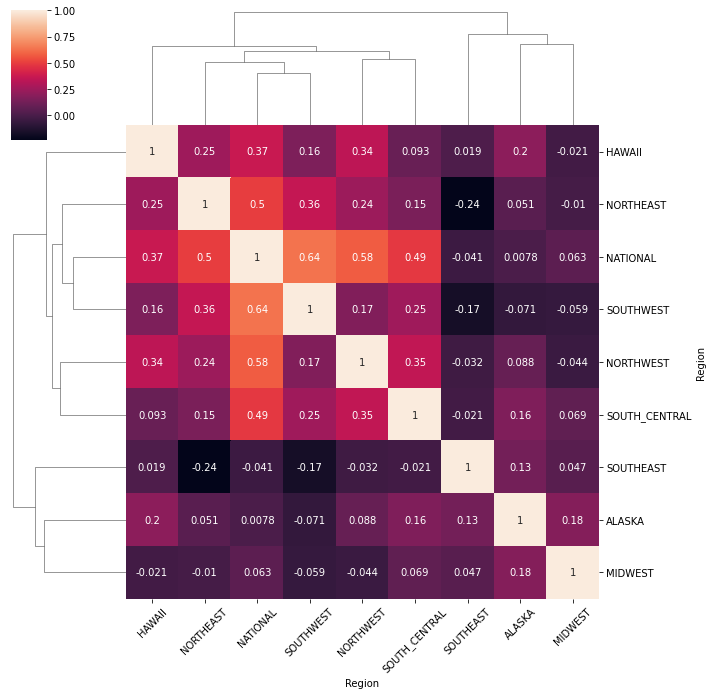

In [154]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!